<a href="https://colab.research.google.com/github/raghavendranhp/Financial_Risk_Detection/blob/main/Financial_Risk_Analysis_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="custom-header" style="padding: 15px; color: white; margin: 0;

*   List item

*   List item
*   List item


*   List item

font-size: 28px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 15px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b> Financial Risk Detection👨‍💼:- Pre-Processing </b>
</div>

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Importing Libraries </b>
</div>

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
from pprint import PrettyPrinter
from datetime import datetime, time

#Data visualization libraries
import seaborn as sns
sns.set()
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
import itertools
%matplotlib inline

#Machine learning libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

#Ignore FutureWarnings to avoid clutter in the output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Initialize PrettyPrinter for neat printing
pp = PrettyPrinter(indent=2)

In [ ]:
import pandas as pd

# Set the maximum number of displayed columns for Pandas DataFrames to 'None' (display all columns)
pd.set_option('display.max_columns', None)

# Set the maximum number of displayed rows for Pandas DataFrames to 200
pd.set_option('display.max_rows', 200)

# Set the maximum column width to 'None' (display complete content)
pd.set_option('display.max_colwidth', None)

# Set the maximum width of the display in characters
pd.set_option('display.width', 1000)

# Enable the display of DataFrames with expanded representation
# This means if the DataFrame has too many columns to fit horizontally within the display,
# it will display it across multiple lines instead of compressing it into fewer lines.
pd.set_option('display.expand_frame_repr', True)


<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Loading Dataset </b>
</div>

In [ ]:
df_column_description_org=pd.read_excel(r"/content/drive/MyDrive/Dataset/Financial Risk Analysis/columns_description.xlsx")
df_app_data_org=pd.read_csv(r"/content/drive/MyDrive/Dataset/Financial Risk Analysis/application_data.csv")
df_pre_app_org=pd.read_csv(r"/content/drive/MyDrive/Dataset/Financial Risk Analysis/previous_application.csv")

In [ ]:
#Make a copy of the original DataFrame to work with
df_app_data=df_app_data_org.copy()
df_pre_app=df_pre_app_org.copy()
df_column_description=df_column_description_org.copy()

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Dictionary </b>
</div>

In [ ]:
#df_column_description=df_column_description.drop(['Unnamed: 0'],axis=1)
display(df_column_description.head(160))

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Wrangling </b>
</div>

<div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Application Data</div>

In [ ]:
df_app_data.shape

(307511, 122)

In [ ]:
df_app_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [ ]:
df_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
#Display descriptive statistics for numerical columns in the DataFrame
df_app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [ ]:
#Display descriptive statistics for categorical (object) columns in the DataFrame
df_app_data.describe(include="O")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [ ]:
#Get the names of categorical columns in the DataFrame
categorical_columns_app=df_app_data.select_dtypes(include='O').columns
#Get the names of numerical columns in the DataFrame
numerical_columns_app=df_app_data.select_dtypes(include='number').columns

In [ ]:
#Iterate over each categorical column in the DataFrame
for i in categorical_columns_app:
    #Print the unique values of the current categorical column
    print('Unique values of', i, set(df_app_data[i]))
    #Print the count of each unique value in the current categorical column
    print(df_app_data[i].value_counts())
    #Print a separator line for better readability
    print('-' * 50)

Unique values of NAME_CONTRACT_TYPE {'Revolving loans', 'Cash loans'}
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
Unique values of CODE_GENDER {'M', 'XNA', 'F'}
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
--------------------------------------------------
Unique values of FLAG_OWN_CAR {'N', 'Y'}
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
--------------------------------------------------
Unique values of FLAG_OWN_REALTY {'N', 'Y'}
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
--------------------------------------------------
Unique values of NAME_TYPE_SUITE {'Children', 'Other_A', 'Spouse, partner', 'Family', 'Unaccompanied', 'Group of people', 'Other_B', nan}
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people   

In [ ]:
#Calculate null value percentage for each column
null_percentage_app= (df_app_data.isnull().mean() * 100).round(4)

#Create a new dataframe to display columns and null value percentages
null_df_app = pd.DataFrame({'Column': null_percentage_app.index, 'Null Percentage': null_percentage_app.values})

#Display the dataframe
print(null_df_app.sort_values(ascending=False,by='Null Percentage').head(100))

                           Column  Null Percentage
76                COMMONAREA_MEDI            69.87
48                 COMMONAREA_AVG            69.87
62                COMMONAREA_MODE            69.87
70       NONLIVINGAPARTMENTS_MODE            69.43
56        NONLIVINGAPARTMENTS_AVG            69.43
84       NONLIVINGAPARTMENTS_MEDI            69.43
86             FONDKAPREMONT_MODE            68.39
68          LIVINGAPARTMENTS_MODE            68.35
54           LIVINGAPARTMENTS_AVG            68.35
82          LIVINGAPARTMENTS_MEDI            68.35
52                  FLOORSMIN_AVG            67.85
66                 FLOORSMIN_MODE            67.85
80                 FLOORSMIN_MEDI            67.85
75               YEARS_BUILD_MEDI            66.50
61               YEARS_BUILD_MODE            66.50
47                YEARS_BUILD_AVG            66.50
21                    OWN_CAR_AGE            65.99
81                  LANDAREA_MEDI            59.38
67                  LANDAREA_MO

In [ ]:
#Check the percentage of Null value
null_app=round(df_app_data.isnull().sum()/len(df_app_data)*100,2)
#null_pre.sort_values(ascending=False).head(100)
null_app_40=null_app[null_app>40].sort_values(ascending=False).head(100)
print(null_app_40)
print(len(null_app[null_app>40]))

COMMONAREA_AVG                  69.87
COMMONAREA_MEDI                 69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MODE           68.35
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MEDI                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_MEDI                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MODE               58.52
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [ ]:
print(null_app.filter(like='COMMONAREA'))
print(null_app.filter(like='NONLIVINGAPARTMENTS'))
print(null_app.filter(like='LIVINGAPARTMENTS'))
print(null_app.filter(like='FLOORSMIN'))
print(null_app.filter(like='YEARS_BUILD'))
print(null_app.filter(like='LANDAREA'))
print(null_app.filter(like='HOUSETYPE'))
print(null_app.filter(like='LIVINGAREA'))
print(null_app.filter(like='ENTRANCES'))
print(null_app.filter(like='APARTMENTS'))
print(null_app.filter(like='ELEVATORS'))
print(null_app.filter(like='NONLIVINGAREA'))
print(null_app.filter(like='BASEMENTAREA'))
print(null_app.filter(like='LANDAREA'))
print(null_app.filter(like='WALLSMATERIAL'))
print(null_app.filter(like='HOUSETYPE'))
print(null_app.filter(like='EXT_SOURCE'))
print(null_app.filter(like='FONDKAPREMONT'))
print(null_app.filter(like='CAR'))

COMMONAREA_AVG     69.87
COMMONAREA_MODE    69.87
COMMONAREA_MEDI    69.87
dtype: float64
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_MEDI    69.43
dtype: float64
LIVINGAPARTMENTS_AVG        68.35
NONLIVINGAPARTMENTS_AVG     69.43
LIVINGAPARTMENTS_MODE       68.35
NONLIVINGAPARTMENTS_MODE    69.43
LIVINGAPARTMENTS_MEDI       68.35
NONLIVINGAPARTMENTS_MEDI    69.43
dtype: float64
FLOORSMIN_AVG     67.85
FLOORSMIN_MODE    67.85
FLOORSMIN_MEDI    67.85
dtype: float64
YEARS_BUILD_AVG     66.5
YEARS_BUILD_MODE    66.5
YEARS_BUILD_MEDI    66.5
dtype: float64
LANDAREA_AVG     59.38
LANDAREA_MODE    59.38
LANDAREA_MEDI    59.38
dtype: float64
HOUSETYPE_MODE    50.18
dtype: float64
LIVINGAREA_AVG        50.19
NONLIVINGAREA_AVG     55.18
LIVINGAREA_MODE       50.19
NONLIVINGAREA_MODE    55.18
LIVINGAREA_MEDI       50.19
NONLIVINGAREA_MEDI    55.18
dtype: float64
ENTRANCES_AVG     50.35
ENTRANCES_MODE    50.35
ENTRANCES_MEDI    50.35
dtype: float64
APAR

In [ ]:
df_app_data_fin=df_app_data.drop(columns=null_app_40.index)

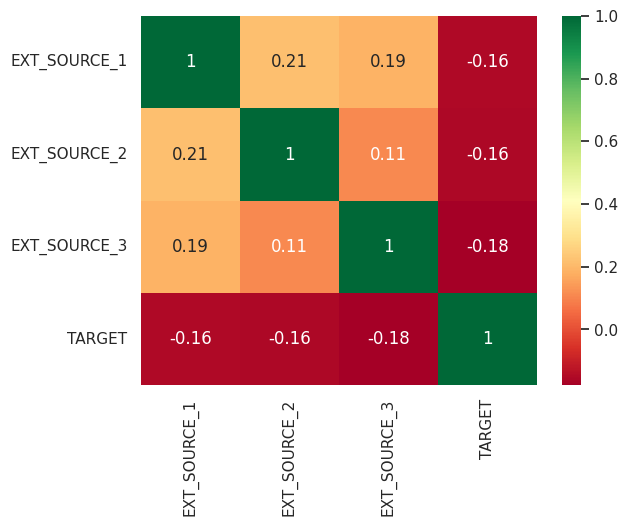

In [ ]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = df_app_data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [ ]:
df_app_data_fin.drop(columns=["EXT_SOURCE_2","EXT_SOURCE_3"],inplace=True)

<ipython-input-19-49e7ebcf44cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})


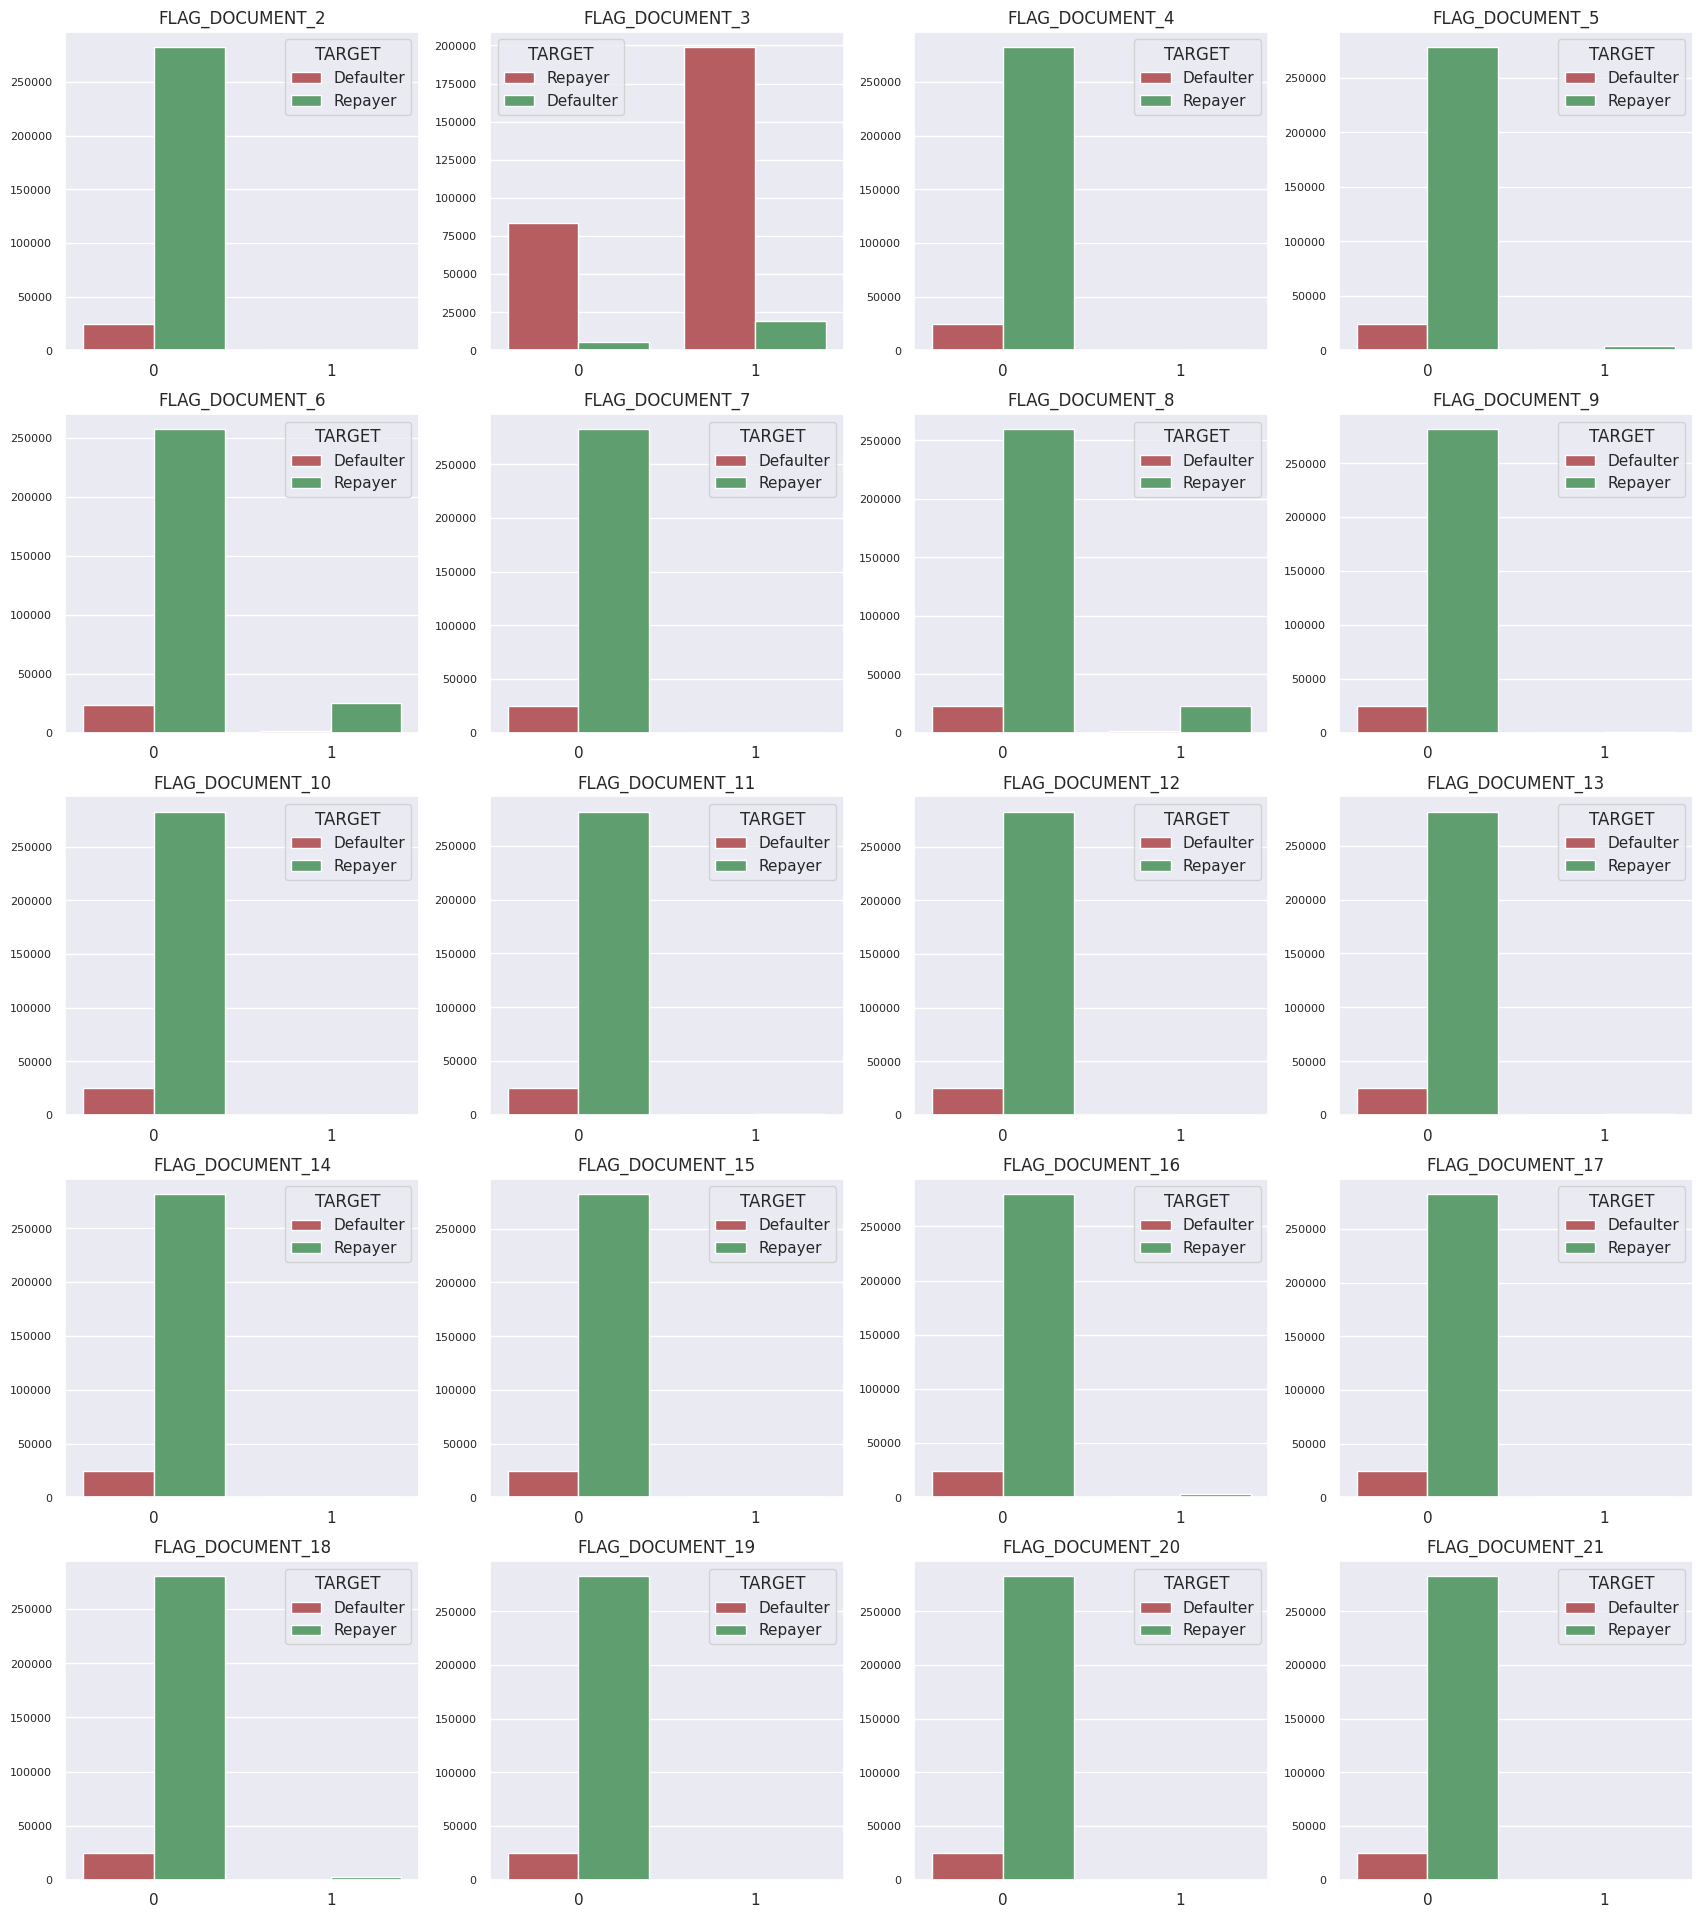

In [ ]:
col_Doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = df_app_data[col_Doc + ["TARGET"]]

df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

length = len(col_Doc)

fig = plt.figure(figsize=(21, 24))

for i, j in itertools.zip_longest(col_Doc, range(length)):
    plt.subplot(5, 4, j+1)
    ax = sns.countplot(data=df_flag, x=i, hue="TARGET", palette=["r", "g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

plt.show()


In [ ]:
col_Doc.remove('FLAG_DOCUMENT_3')

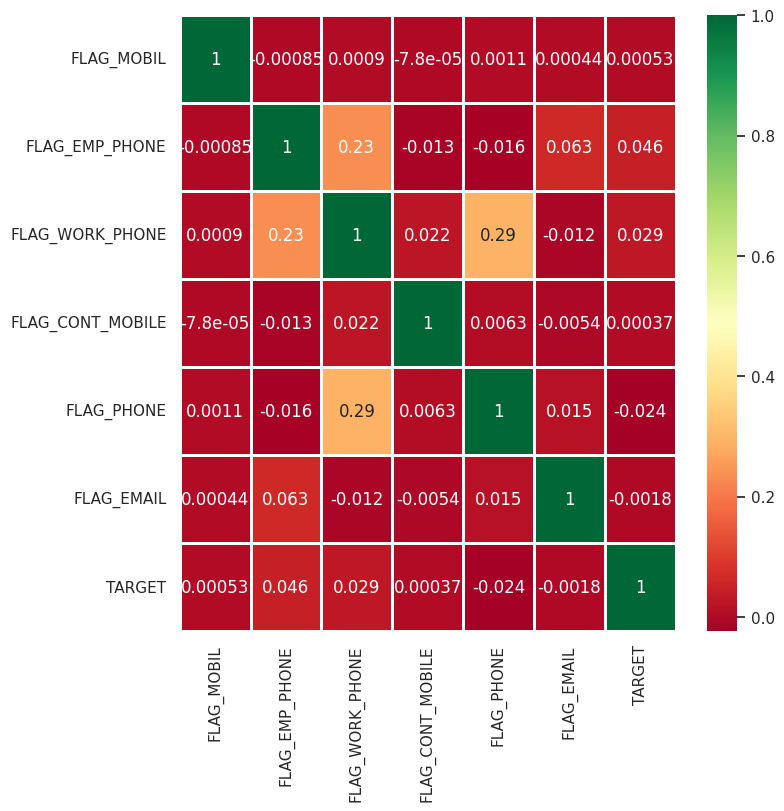

In [ ]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = df_app_data_fin[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)


In [ ]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET')

In [ ]:
df_app_data_fin.drop(columns=col_Doc,inplace=True)
df_app_data_fin.drop(columns=contact_col,inplace=True)

In [ ]:
#Find columns with missing values greater than or equal to 1
missing_values_count = df_app_data_fin.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count >= 1]
print("Columns with missing values greater than or equal to 1:")
print(columns_with_missing_values)

Columns with missing values greater than or equal to 1:
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64


In [ ]:
for i in columns_with_missing_values.index:
  if i in categorical_columns_app:
    print (i)


NAME_TYPE_SUITE
OCCUPATION_TYPE


In [ ]:
df_app_data_fin['NAME_TYPE_SUITE'].fillna((df_app_data_fin['NAME_TYPE_SUITE'].mode()[0]),inplace = True)
df_app_data_fin['OCCUPATION_TYPE'].fillna('Others', inplace =True)

In [ ]:
colu_app=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']

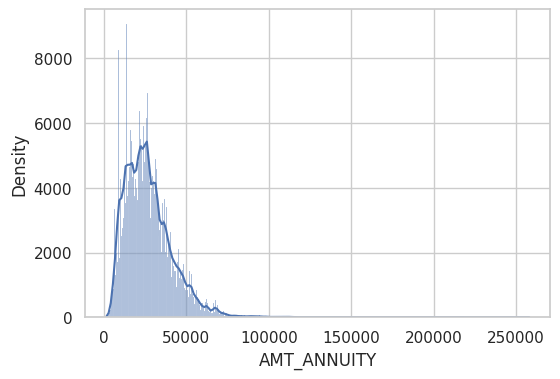

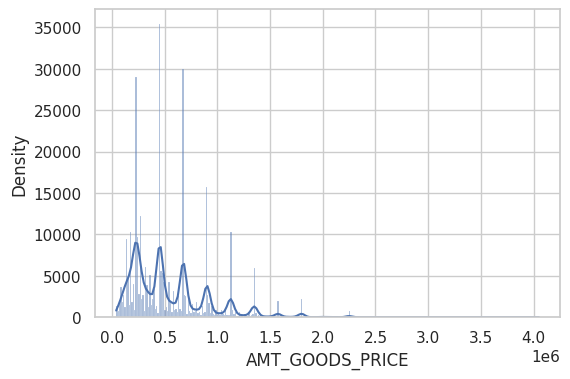

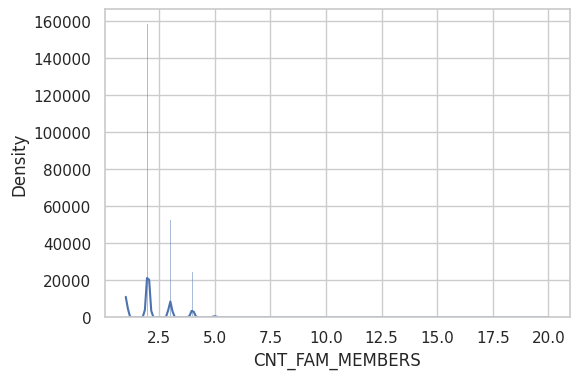

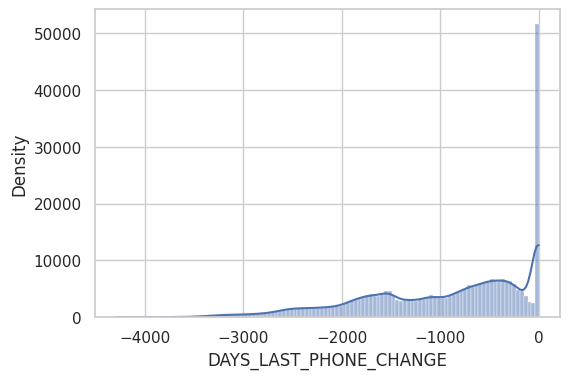

In [ ]:
for col in colu_app:
    plt.figure(figsize=(6, 4))
    sns.set_style('whitegrid')
    sns.histplot(df_app_data_fin[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [ ]:
mean_value_AA = df_app_data_fin['AMT_ANNUITY'].mean()
df_app_data_fin['AMT_ANNUITY'].fillna(mean_value_AA, inplace=True)
mean_value_Agp = df_app_data_fin['AMT_GOODS_PRICE'].mean()
df_app_data_fin['AMT_GOODS_PRICE'].fillna(mean_value_Agp, inplace=True)
med_value_CFM = df_app_data_fin['CNT_FAM_MEMBERS'].median()
df_app_data_fin['CNT_FAM_MEMBERS'].fillna(med_value_CFM, inplace=True)
mod_value_DLP = df_app_data_fin['DAYS_LAST_PHONE_CHANGE'].mode()[0]
df_app_data_fin['DAYS_LAST_PHONE_CHANGE'].fillna(mod_value_DLP, inplace=True)

In [ ]:
df_app_data_fin[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    df_app_data_fin[col].fillna(df_app_data_fin[col].median(),inplace = True)

In [ ]:
df_app_data_fin['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app_data_fin['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0)
df_app_data_fin['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app_data_fin['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)
df_app_data_fin['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app_data_fin['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
df_app_data_fin['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app_data_fin['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Previous Application Data</div>


In [ ]:
df_pre_app.shape

(1670214, 37)

In [ ]:
df_pre_app.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
df_pre_app.head(50)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
#Display descriptive statistics for categorical (object) columns in the DataFrame
df_pre_app.describe(include="O")

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


In [ ]:
#Display descriptive statistics for categorical (object) columns in the DataFrame
df_pre_app.describe(include="O")

In [ ]:
#Get the names of categorical columns in the DataFrame
categorical_columns_pre=df_pre_app.select_dtypes(include='O').columns
#Get the names of numerical columns in the DataFrame
numerical_columns_pre=df_pre_app.select_dtypes(include='number').columns

In [ ]:
#Iterate over each categorical column in the DataFrame
for i in categorical_columns_pre:
    #Print the unique values of the current categorical column
    print('Unique values of', i, set(df_pre_app[i]))
    #Print the count of each unique value in the current categorical column
    print(df_pre_app[i].value_counts())
    #Print a separator line for better readability
    print('-' * 50)

Unique values of NAME_CONTRACT_TYPE {'XNA', 'Consumer loans', 'Revolving loans', 'Cash loans'}
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
Unique values of WEEKDAY_APPR_PROCESS_START {'TUESDAY', 'MONDAY', 'SATURDAY', 'THURSDAY', 'SUNDAY', 'WEDNESDAY', 'FRIDAY'}
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
--------------------------------------------------
Unique values of FLAG_LAST_APPL_PER_CONTRACT {'N', 'Y'}
Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
--------------------------------------------------
Unique values of NAME_CASH_LOAN_PURPOSE {'Refusal to name the goal', 'Other', 'Buying a holiday home / land', 'Hobby', 'XAP', 'Buying a new car', 'Medicine', 'Money for 

In [ ]:
#Check the percentage of Null value
null_pre=round(df_pre_app.isnull().sum()/len(df_pre_app)*100,2)
#null_pre.sort_values(ascending=False).head(100)
null_pre_40=null_pre[null_pre>40].sort_values(ascending=False).head(100)
print(null_pre_40)
print(len(null_pre[null_pre>40]))

RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64
11


In [ ]:
print(null_pre.filter(like='RATE'))
print(null_pre.filter(like='NAME'))
print(null_pre.filter(like='DAYS'))
print(null_pre.filter(like='AMT'))
print(null_pre.filter(like='NFLAG'))

RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64
NAME_CONTRACT_TYPE         0.00
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
NAME_PAYMENT_TYPE          0.00
NAME_TYPE_SUITE           49.12
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
NAME_SELLER_INDUSTRY       0.00
NAME_YIELD_GROUP           0.00
dtype: float64
DAYS_DECISION                 0.0
DAYS_FIRST_DRAWING           40.3
DAYS_FIRST_DUE               40.3
DAYS_LAST_DUE_1ST_VERSION    40.3
DAYS_LAST_DUE                40.3
DAYS_TERMINATION             40.3
dtype: float64
AMT_ANNUITY         22.29
AMT_APPLICATION      0.00
AMT_CREDIT           0.00
AMT_DOWN_PAYMENT    53.64
AMT_GOODS_PRICE     23.08
dtype: float64
NFLAG_LAST_APPL_IN_DAY        0.0
NFLAG_INSURED_ON_APPROVAL    40.3
dtype: float64


In [ ]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
df_pre_app_fin=df_pre_app.drop(columns=null_pre_40.index)
df_pre_app_fin=df_pre_app_fin.drop(columns=Unnecessary_previous)

In [ ]:
print(df_pre_app_fin.shape)

(1670214, 22)


In [ ]:
df_pre_app_fin.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

In [ ]:
null_pre=round(df_pre_app_fin.isnull().sum()/len(df_pre_app)*100,2)
#null_pre.sort_values(ascending=False).head(100)
null_pre_0=null_pre[null_pre>0].sort_values(ascending=False).head(100)
print(null_pre_0)

AMT_GOODS_PRICE        23.08
AMT_ANNUITY            22.29
CNT_PAYMENT            22.29
PRODUCT_COMBINATION     0.02
dtype: float64


In [ ]:
print(null_pre_0.index)

Index(['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'PRODUCT_COMBINATION'], dtype='object')


In [ ]:
mode_value_pc = df_pre_app_fin['PRODUCT_COMBINATION'].mode()[0]
df_pre_app_fin['PRODUCT_COMBINATION'].fillna(mode_value_pc, inplace=True)
mode_value_amtcr = df_pre_app_fin['AMT_CREDIT'].mode()[0]
df_pre_app_fin['AMT_CREDIT'].fillna(mode_value_amtcr, inplace=True)

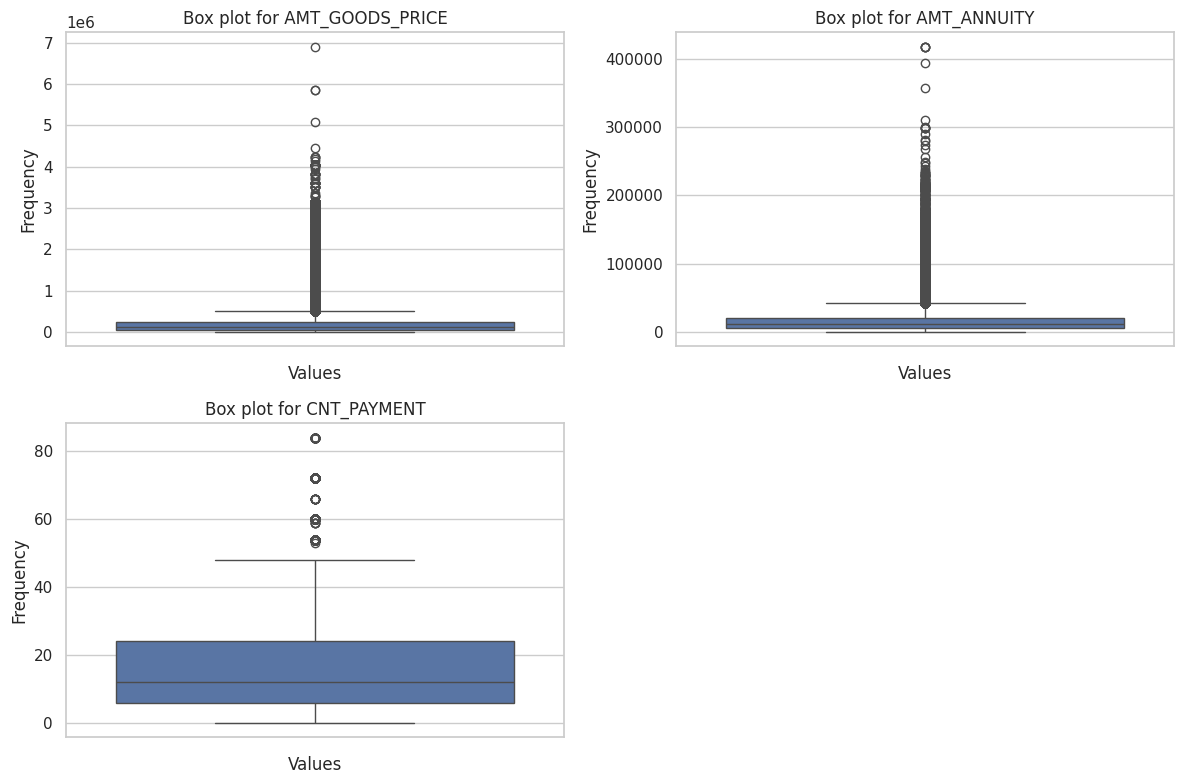

In [ ]:
# Specify the columns for which you want to plot box plots
columns = ['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT']

# Plot separate box plots for each column
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_pre_app_fin[column])
    plt.title(f'Box plot for {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


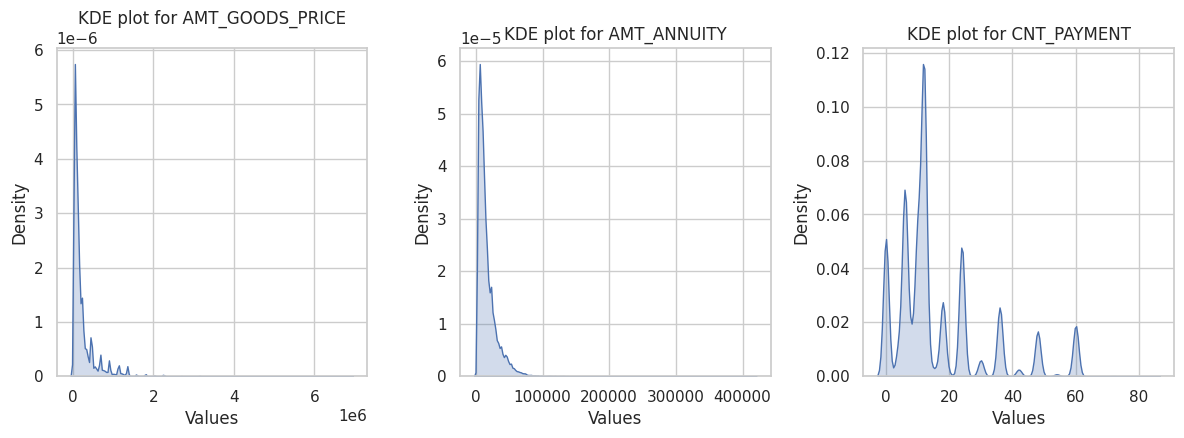

In [ ]:
# Plot KDE plots for each column
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df_pre_app_fin[column], shade=True)
    plt.title(f'KDE plot for {column}')
    plt.xlabel('Values')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
med_value_cnt = df_pre_app_fin['CNT_PAYMENT'].median()
df_pre_app_fin['CNT_PAYMENT'].fillna(med_value_cnt, inplace=True)
med_value_amtgp = df_pre_app_fin['AMT_GOODS_PRICE'].median()
df_pre_app_fin['AMT_GOODS_PRICE'].fillna(med_value_amtgp, inplace=True)
med_value_amtat = df_pre_app_fin['AMT_ANNUITY'].median()
df_pre_app_fin['AMT_ANNUITY'].fillna(med_value_amtat, inplace=True)

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Standardize Values & Data Conversion </div>

In [ ]:
#Converting Negative days to positive days
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for col in date_col:
    df_app_data_fin[col] = abs(df_app_data_fin[col])

In [ ]:
#Binning Numerical Columns to create a categorical column
#Creating bins for income amount
df_amt_tot=pd.DataFrame()
df_amt_tot['AMT_INCOME_TOTAL']=df_app_data_fin['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
df_app_data_fin['AMT_INCOME_RANGE']=pd.cut(df_amt_tot['AMT_INCOME_TOTAL'],bins,labels=slot)

In [ ]:
#Creating bins for Credit amount
df_amt_tot['AMT_CREDIT']=df_app_data_fin['AMT_CREDIT']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']
df_app_data_fin['AMT_CREDIT_RANGE']=pd.cut(df_amt_tot['AMT_CREDIT'],bins=bins,labels=slots)

In [ ]:
#Creating bins for Age
df_amt_tot['AGE'] = df_app_data_fin['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,60,100]
slots = ['0-20','20-30','30-40','40-50','50-60','60 above']
df_app_data_fin['AGE_GROUP']=pd.cut(df_amt_tot['AGE'],bins=bins,labels=slots)

In [ ]:
#Creating bins for Employement Time
df_app_data_fin['YEARS_EMPLOYED'] = df_app_data_fin['DAYS_EMPLOYED'] // 365
# Replace outliers with the maximum value of the bin range
max_bin_range = 80  # maximum value for '50 above' bin
df_app_data_fin['YEARS_EMPLOYED'] = df_app_data_fin['YEARS_EMPLOYED'].clip(upper=max_bin_range)
#Define the bin ranges
bins = [0, 1, 2, 3, 4, 5, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, np.inf]
#Perform binning
slots = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-8', '8-10', '10-15', '15-20', '20-25', '25-30',
         '30-35', '35-40', '40-45', '45-50', '50 above']
df_app_data_fin['EMPLOYMENT_YEAR'] = pd.cut(df_app_data_fin['YEARS_EMPLOYED'], bins=bins, labels=slots)
#Fill missing values in EMPLOYMENT_YEAR column with '0-1'
df_app_data_fin['EMPLOYMENT_YEAR'].fillna('0-1', inplace=True)

In [ ]:
df_app_data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [ ]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    df_app_data_fin[col] =pd.Categorical(df_app_data_fin[col])

In [ ]:
#Converting negative days to positive days
df_pre_app_fin['DAYS_DECISION'] = abs(df_pre_app_fin['DAYS_DECISION'])

In [ ]:
#age group calculation e.g. 388 will be grouped as 300-400
df_pre_app_fin['DAYS_DECISION_GROUP'] = (df_pre_app_fin['DAYS_DECISION']-(df_pre_app_fin['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((df_pre_app_fin['DAYS_DECISION'] - (df_pre_app_fin['DAYS_DECISION'] % 400)) + (df_pre_app_fin['DAYS_DECISION'] % 400) + (400 - (df_pre_app_fin['DAYS_DECISION'] % 400))).astype(str)

In [ ]:
#Converting Categorical columns from Object to categorical
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    df_pre_app_fin[col] =pd.Categorical(df_pre_app_fin[col])

In [ ]:
df_pre_app_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670214 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

In [ ]:
df_pre_app_fin.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961139e+05,2.011815e+05,8.806797e+02,3.139511e+02,1.515057e+01
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.808629e+05,7.790997e+02,7.127443e+03,1.295220e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,2.800000e+02,-1.000000e+00,1.000000e+01
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01


In [ ]:
def plot_hist_box_side_by_side(data, figsize=(10, 5)):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    # Set figure size
    for column in numeric_columns:
      plt.figure(figsize=figsize)

      # Plot histogram
      plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, and index 1 (left)
      sns.histplot(data[column], bins=20, kde=True, color='skyblue')
      plt.title(f'Histogram of {column}')
      plt.xlabel(column)
      plt.ylabel('Frequency')

      # Plot box plot
      plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, and index 2 (right)
      sns.boxplot(x=data[column], color='lightgreen')
      plt.title(f'Box Plot of {column}')
      plt.xlabel(column)

      # Adjust layout
      plt.tight_layout()

      # Show plot
      plt.show()

In [ ]:
def log_transform(data, column):
    data[column] = np.log(data[column])

def square_transform(data, column):
    data[column] = data[column] ** 2

def square_root_transform(data, column):
    data[column] = np.sqrt(data[column])

def remove_outliers(data, column, low_qr=0.99, up_qr=0.99):
    upper_limit = df['column_name'].quantile(up_qr)
    lower_limit = df['column_name'].quantile(low_qr)
    data = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]
    return data

def cap_outliers(data, column, up_qr=0.99):
    upper_limit = df['column_name'].quantile(up_qr)
    data[column] = data[column].clip(upper=upper_limit)

def floor_outliers(data, column, low_qr=0.99):
    lower_limit = df['column_name'].quantile(low_qr)
    data[column] = data[column].clip(lower=lower_limit)


In [ ]:
"""
1. **Log Transformation**: Use a log transformation when the data is skewed to the right (positively skewed) or
when you want to stabilize the variance.

2. **Square Transformation**: This transformation is typically used to emphasize higher values or to normalize the distribution.

3. **Square Root Transformation**: Square root transformation is useful for reducing skewness, especially in data with lower values.

4. **Removing Outliers**: Removing outliers should be considered when the outliers are rare and do not represent typical behavior. However,
this should be done cautiously as it may result in loss of information.

5. **Capping**: Capping involves setting a maximum or minimum value for outliers.
 This can help prevent extreme values from influencing the analysis while retaining the rest of the data.

6. **Flooring**: Flooring sets a minimum value for outliers, similar to capping but in the lower range.

Here's how you can create separate functions for each transformation or treatment method:


Before applying any transformation or treatment, it's crucial to
understand the distribution of your data and consider the implications of each method on your analysis.
Additionally, it's a good practice to evaluate the effect of each transformation or treatment on your data's distribution and
 statistical properties.

"""


In [ ]:
df_app_data_fin.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,2.152664,12.063419,0.015144,1.417523,0.142944,1.400626,0.099717,962.855657,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,19.355643
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.910679,3.265832,0.122126,2.398395,0.446033,2.377224,0.361735,826.808966,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,29.007859
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,3.000000,14.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,15.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,20.000000,23.000000,1.000000,348.000000,34.000000,344.000000,24.000000,4292.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,80.000000


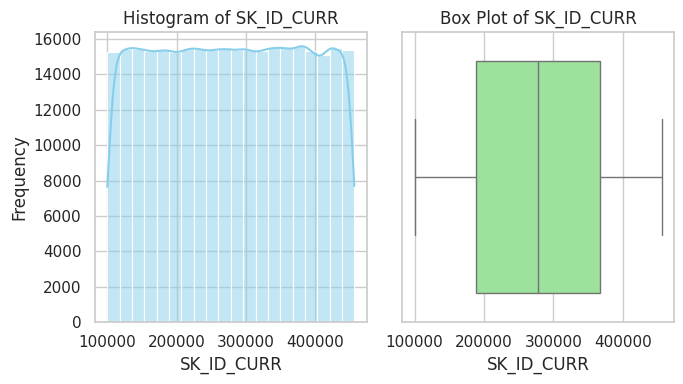

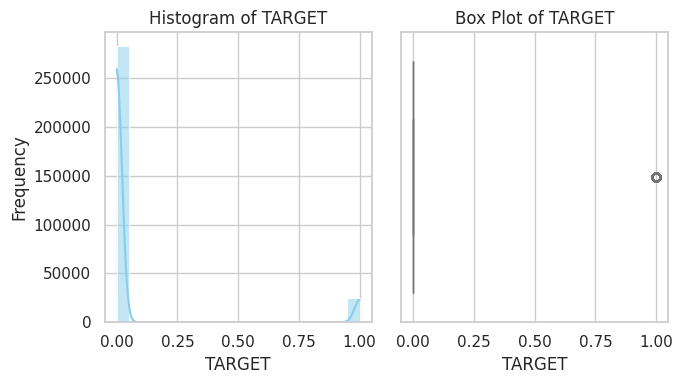

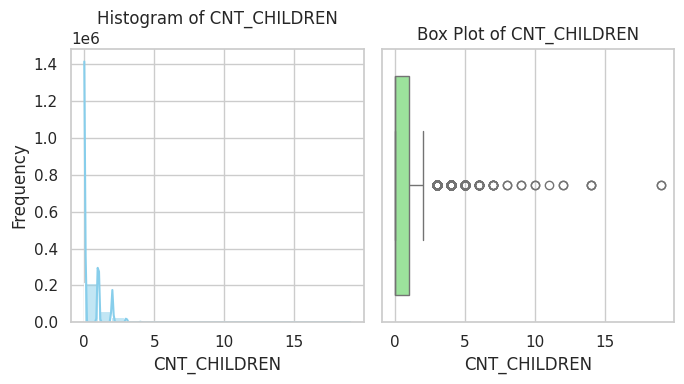

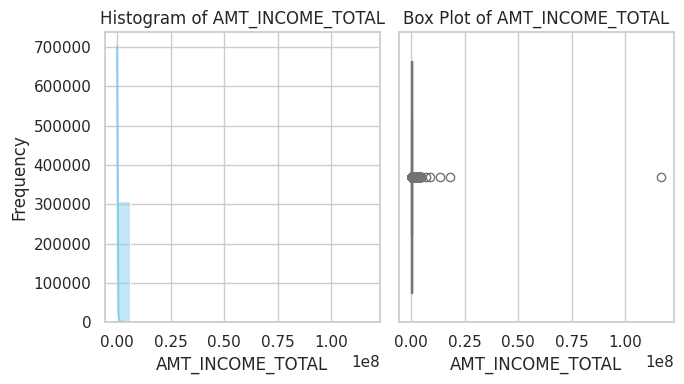

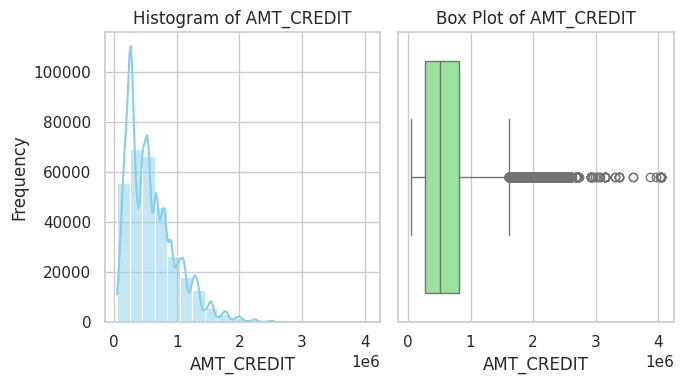

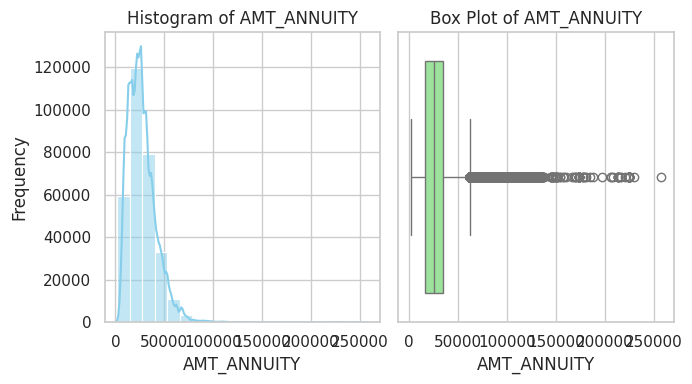

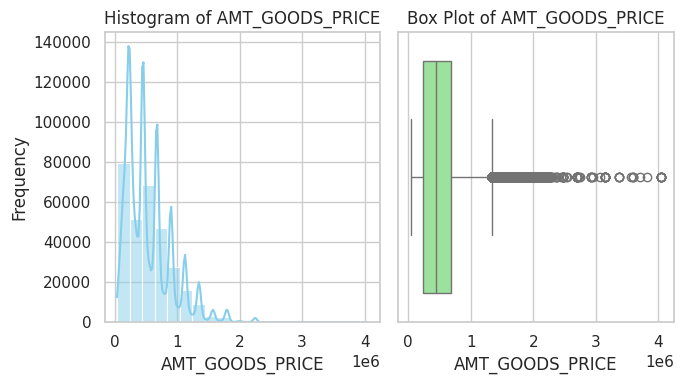

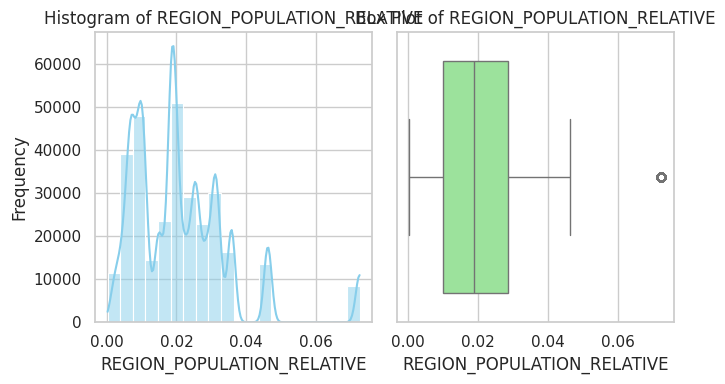

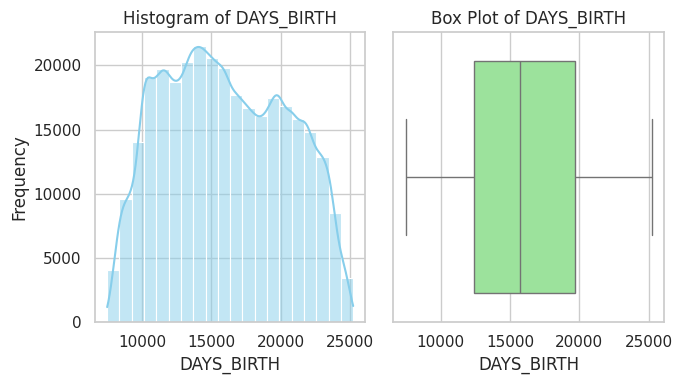

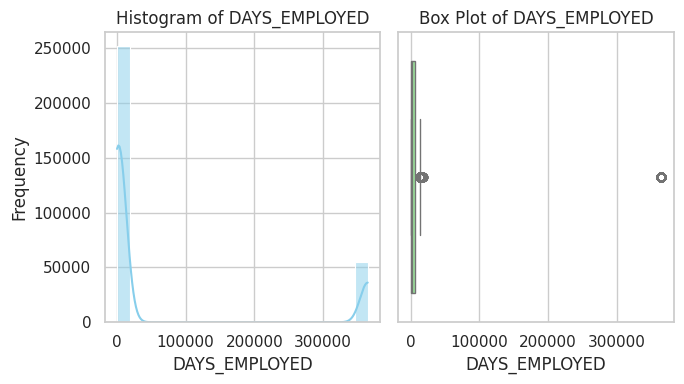

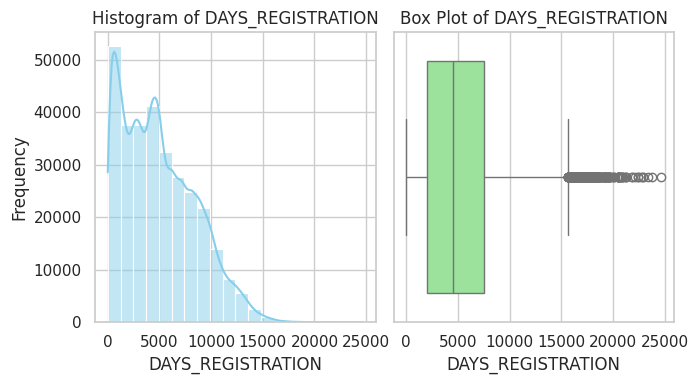

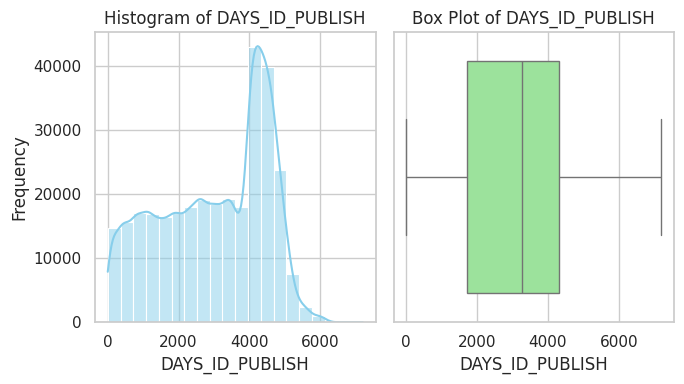

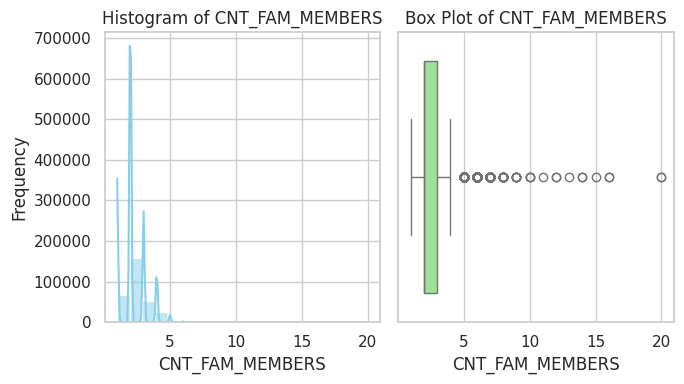

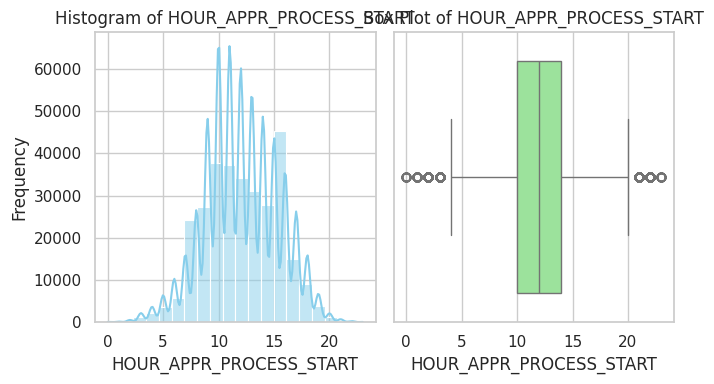

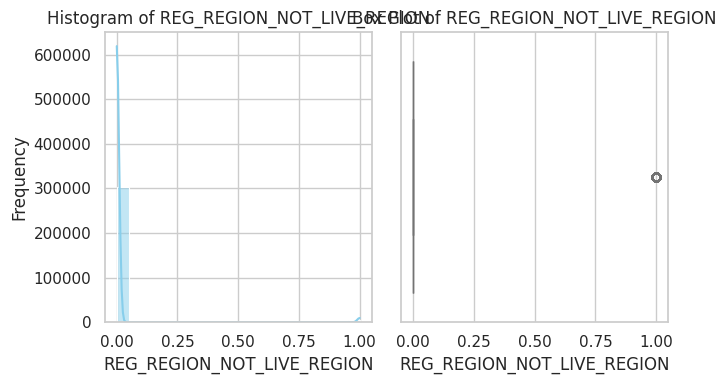

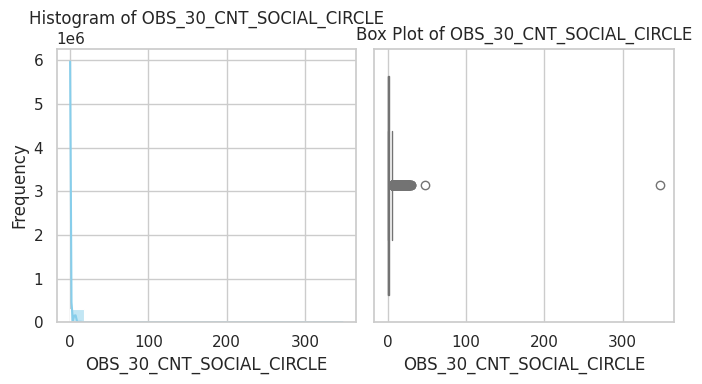

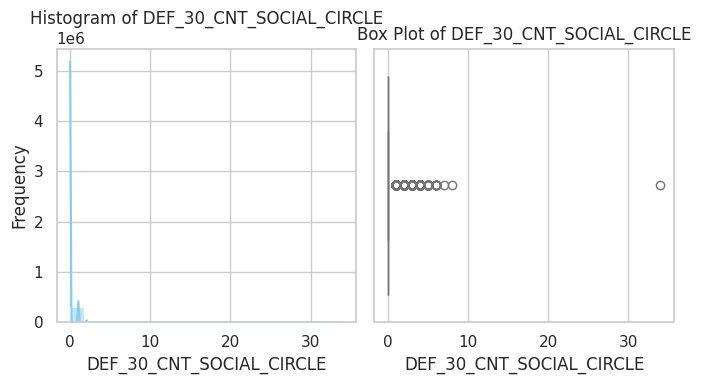

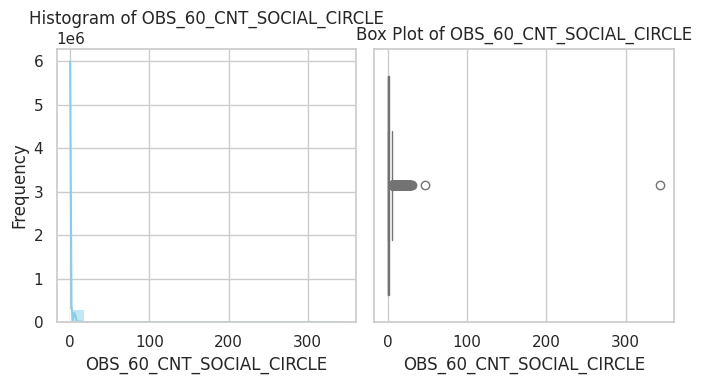

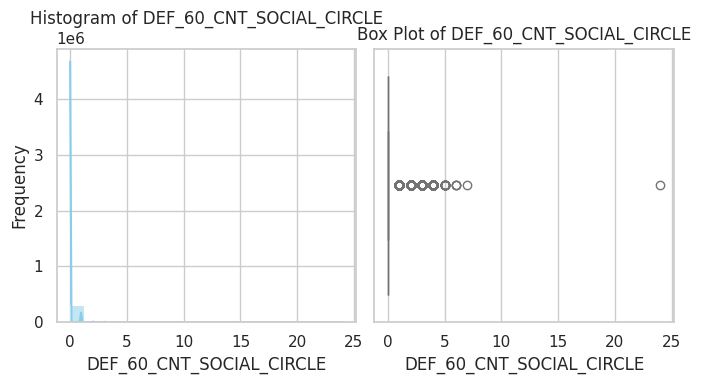

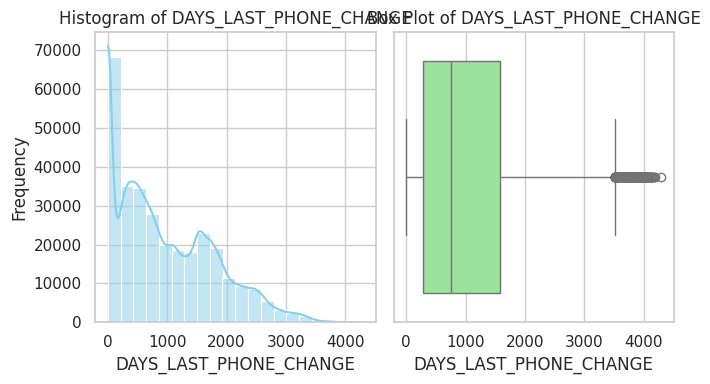

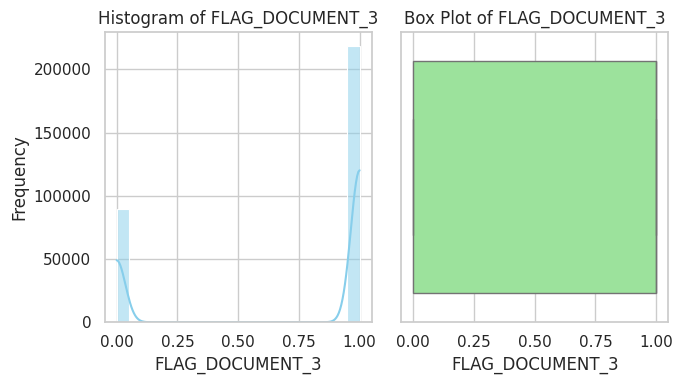

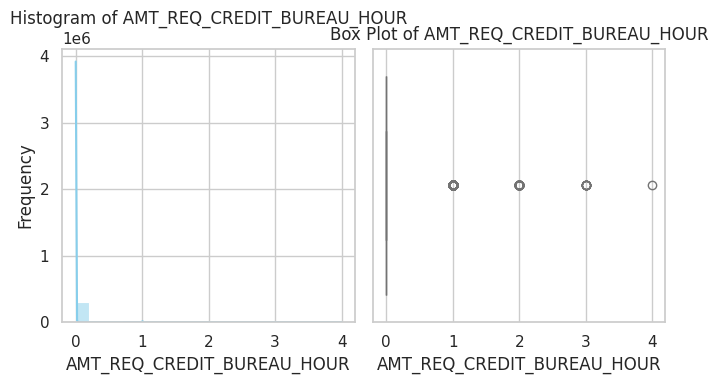

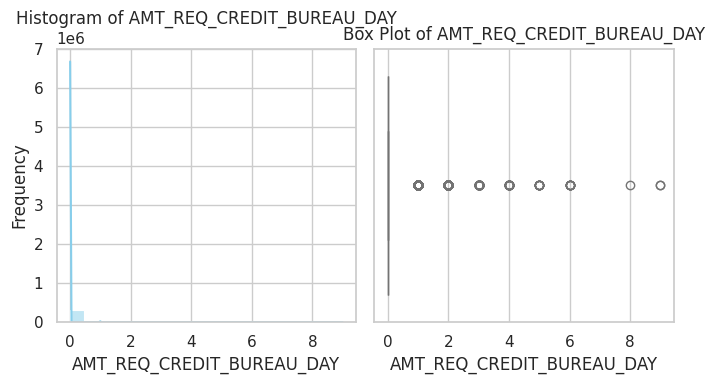

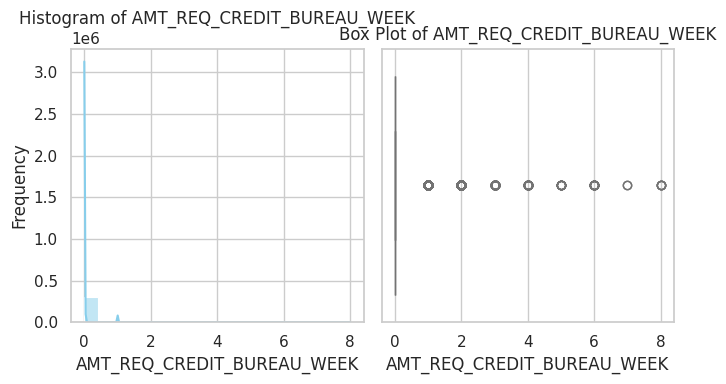

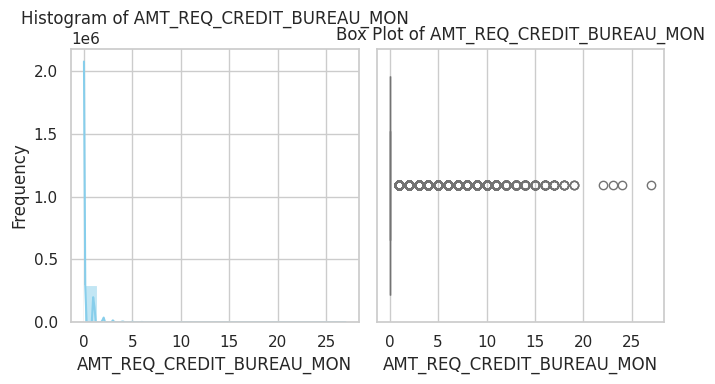

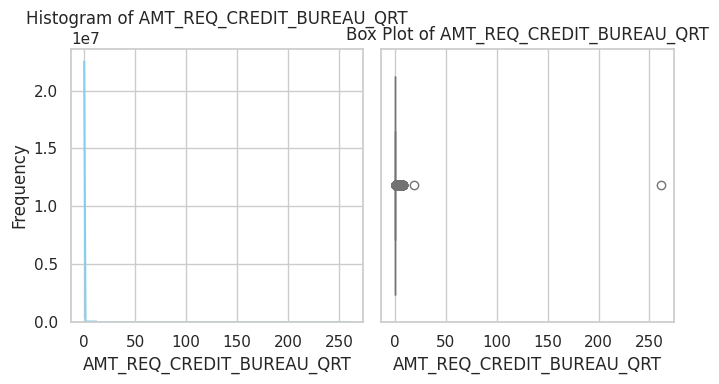

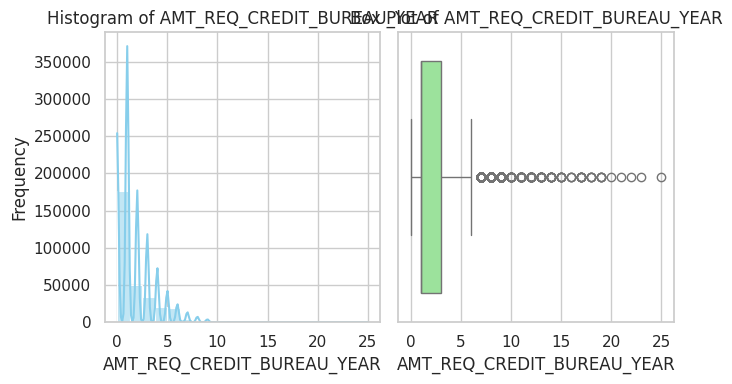

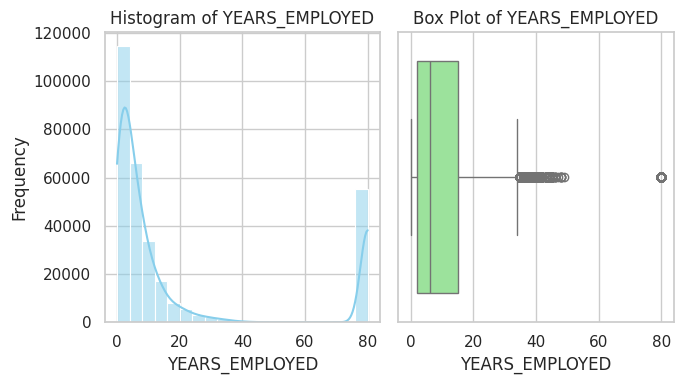

In [ ]:
plot_hist_box_side_by_side(df_app_data_fin, figsize=(7, 4))

In [ ]:
cap_col=['AMT_INCOME_TOTAL',]
log_col=[]
rem_col=[]
flo_col=[]
sq_col=[]
sqrt_col=[]

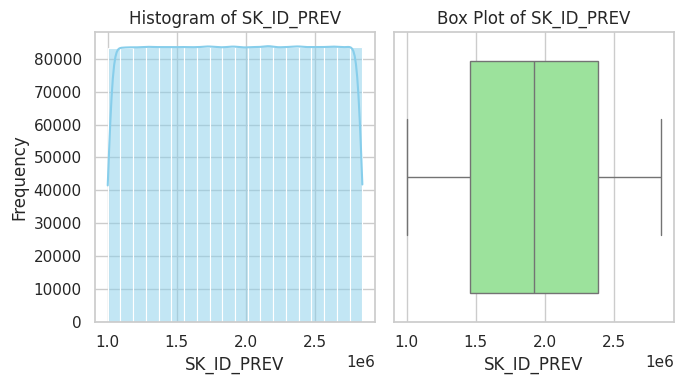

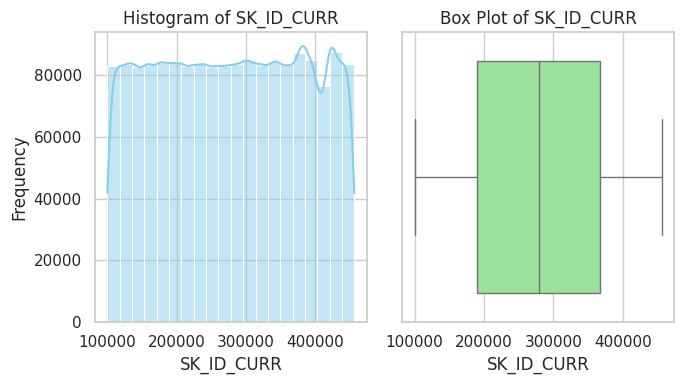

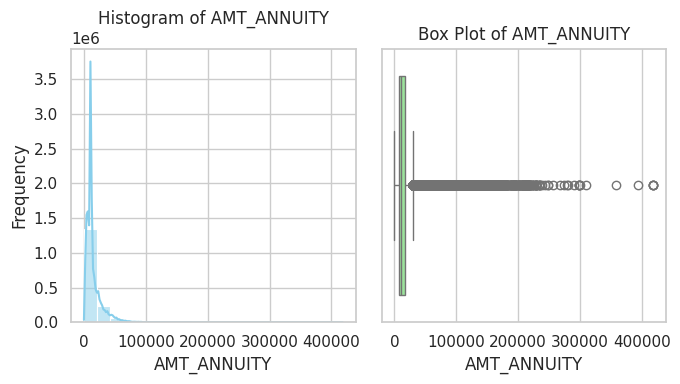

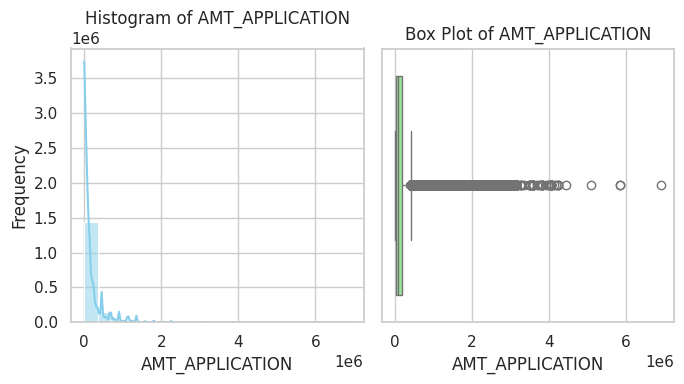

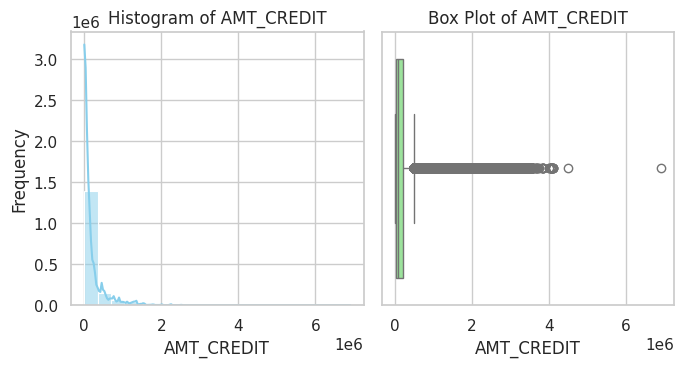

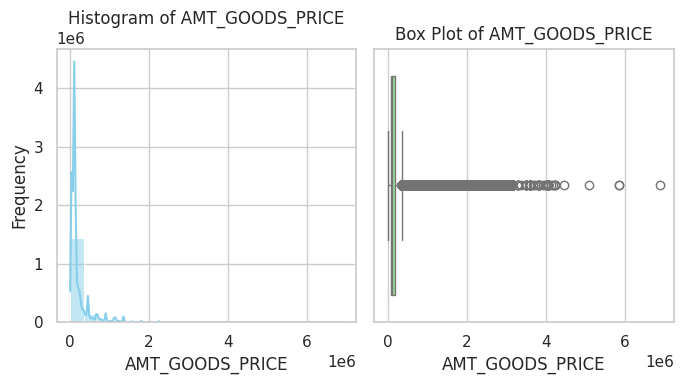

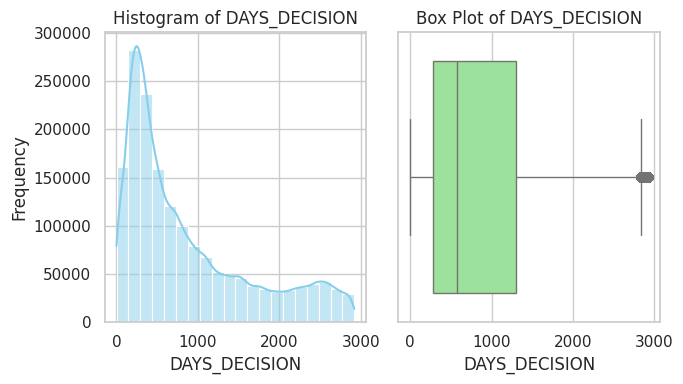

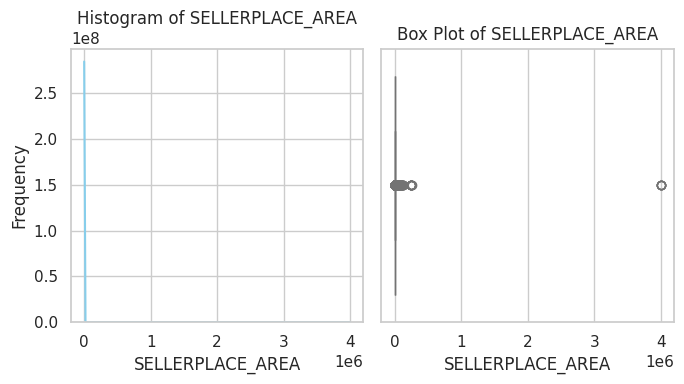

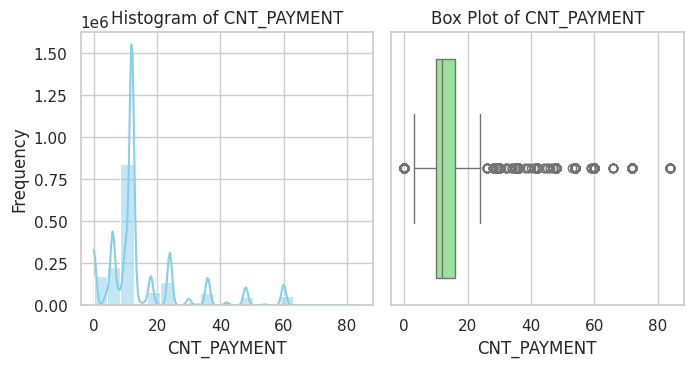

In [ ]:
plot_hist_box_side_by_side(df_pre_app_fin, figsize=(7, 4))

In [ ]:
combined_df= pd.merge(df_app_data_fin, df_pre_app_fin, on='SK_ID_CURR', how='inner')

combined_df.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
print(combined_df.head(10))

    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0       100002 

In [ ]:
combined_df.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')

In [ ]:
combined_df.shape

(291057, 74)

In [ ]:
corrmat = combined_df.corr()

f, ax = plt.subplots(figsize =(14, 14))
sns.heatmap(corrmat, ax = ax, cmap ="rainbow")
plt.show()

In [ ]:
# Calculate the correlation matrix
corrmat = combined_df.corr()

# Create a mask to exclude the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(corrmat, dtype=bool), k=1)

# Apply the mask to the correlation matrix
corrdf = corrmat.mask(mask)

# Unstack the correlation matrix and reset index
corrdf = corrdf.unstack().reset_index()

# Rename columns
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows where 'Correlation' is NaN (due to applying the mask)
corrdf.dropna(subset=['Correlation'], inplace=True)

# Take absolute values of correlations
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort by correlation values in descending order
corrdf.sort_values(by='Correlation', ascending=False, inplace=True)

# Display highly correlated pairs of variables
highly_correlated = corrdf[corrdf['Correlation'] > 0.75]
highly_correlated


,Var1,Var2,Correlation
0,SK_ID_CURR,SK_ID_CURR,1.000000
38,TARGET,TARGET,1.000000
646,OBS_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,1.000000
608,DEF_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,1.000000
570,OBS_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.000000
532,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_LIVE_REGION,1.000000
494,HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,1.000000
456,CNT_FAM_MEMBERS,CNT_FAM_MEMBERS,1.000000
418,DAYS_ID_PUBLISH,DAYS_ID_PUBLISH,1.000000
380,DAYS_REGISTRATION,DAYS_REGISTRATION,1.000000


In [ ]:
def drop_highly_correlated_columns(data, threshold=0.8):

    # Calculate the correlation matrix
    corr_matrix = data.corr().abs()

    # Create a mask to identify highly correlated features
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

    # Identify pairs of highly correlated features
    correlated_pairs = np.where(corr_matrix > threshold)

    # Initialize set to store columns to drop
    columns_to_drop = set()

    # Iterate through correlated pairs and drop one column from each pair
    for i, j in zip(*correlated_pairs):
        # Check if both columns are not already marked to be dropped
        if i not in columns_to_drop and j not in columns_to_drop:
            # Keep the column with higher importance or any preference
            # Here, we are dropping the second column of each pair
            columns_to_drop.add(j)

    # Drop the highly correlated columns
    data_filtered = data.drop(columns=data.columns[list(columns_to_drop)])

    return data_filtered

# Example usage:
# Assuming df is your DataFrame
df_filtered = drop_highly_correlated_columns(combined_df)
df_filtered.shape

(291057, 37)

In [ ]:
df_filtered.columns

Index(['DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AGE', 'AGE_GROUP', 'YEARS_EMPLOYED', 'EMPLOYMENT_YEAR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_DECISION_GROUP'], dtype='object')

Certainly! Here's a comprehensive categorization of all columns into different groups:

### Identification:
1. **SK_ID_CURR**: Current application ID
2. **SK_ID_PREV**: Previous credit application ID

### Target Variable:
1. **TARGET**: Binary indicator of client defaulting on loan

### Contract Details:
1. **NAME_CONTRACT_TYPE**: Type of loan contract
2. **FLAG_LAST_APPL_PER_CONTRACT**: Flag indicating if the current application is the last application per contract
3. **NFLAG_LAST_APPL_IN_DAY**: Flag indicating if the current application is the last application per day
4. **NAME_CONTRACT_STATUS**: Status of the loan contract

### Personal Information:
1. **CODE_GENDER**: Gender of applicant
2. **FLAG_OWN_CAR**: Flag indicating if applicant owns a car
3. **FLAG_OWN_REALTY**: Flag indicating if applicant owns realty
4. **CNT_CHILDREN**: Number of children the applicant has
5. **CNT_FAM_MEMBERS**: Number of family members

### Financial Details:
1. **AMT_INCOME_TOTAL**: Total income of the applicant
2. **AMT_CREDIT**: Total credit amount
3. **AMT_ANNUITY**: Annuity amount
4. **AMT_GOODS_PRICE**: Goods price for which the loan was applied

### Residence Details:
1. **REGION_POPULATION_RELATIVE**: Normalized population of region where client lives
2. **REGION_RATING_CLIENT**: Rating of the region where the client lives
3. **REGION_RATING_CLIENT_W_CITY**: Rating of the region with city included
4. **REG_REGION_NOT_LIVE_REGION**: Flag indicating if client's permanent address does not match contact address
5. **REG_REGION_NOT_WORK_REGION**: Flag indicating if client's permanent address does not match work address
6. **LIVE_REGION_NOT_WORK_REGION**: Flag indicating if client's contact address does not match work address
7. **REG_CITY_NOT_LIVE_CITY**: Flag indicating if client's permanent city does not match contact city
8. **REG_CITY_NOT_WORK_CITY**: Flag indicating if client's permanent city does not match work city
9. **LIVE_CITY_NOT_WORK_CITY**: Flag indicating if client's contact city does not match work city

### Work Details:
1. **DAYS_EMPLOYED**: Number of days before application the person started current employment
2. **NAME_INCOME_TYPE**: Income type of applicant
3. **NAME_EDUCATION_TYPE**: Education level of applicant
4. **NAME_FAMILY_STATUS**: Family status of applicant
5. **NAME_HOUSING_TYPE**: Housing type of applicant
6. **OCCUPATION_TYPE**: Occupation of applicant
7. **ORGANIZATION_TYPE**: Type of organization where applicant works

### Communication Details:
1. **FLAG_MOBIL**: Flag indicating if client provided a mobile phone
2. **FLAG_EMP_PHONE**: Flag indicating if client provided a work phone
3. **FLAG_WORK_PHONE**: Flag indicating if client provided a mobile phone for work
4. **FLAG_CONT_MOBILE**: Flag indicating if client provided a mobile phone contact
5. **FLAG_PHONE**: Flag indicating if client provided a home phone
6. **FLAG_EMAIL**: Flag indicating if client provided an email address

### Document Details:
1. **FLAG_DOCUMENT_2** to **FLAG_DOCUMENT_21**: Flags indicating if client provided various documents

### Credit Bureau Requests:
1. **AMT_REQ_CREDIT_BUREAU_HOUR**: Number of enquiries to Credit Bureau about client one hour before application
2. **AMT_REQ_CREDIT_BUREAU_DAY**: Number of enquiries to Credit Bureau about client one day before application
3. **AMT_REQ_CREDIT_BUREAU_WEEK**: Number of enquiries to Credit Bureau about client one week before application
4. **AMT_REQ_CREDIT_BUREAU_MON**: Number of enquiries to Credit Bureau about client one month before application
5. **AMT_REQ_CREDIT_BUREAU_QRT**: Number of enquiries to Credit Bureau about client three months before application
6. **AMT_REQ_CREDIT_BUREAU_YEAR**: Number of enquiries to Credit Bureau about client one year before application

### Previous Credit History:
1. **AMT_APPLICATION**: Amount applied for in previous credit
2. **AMT_DOWN_PAYMENT**: Down payment amount in previous credit
3. **RATE_DOWN_PAYMENT**: Down payment rate for previous credit
4. **DAYS_DECISION**: Number of days before decision was made on previous credit
5. **DAYS_FIRST_DRAWING**: Number of days before first drawing in previous credit
6. **DAYS_FIRST_DUE**: Number of days before first due date in previous credit
7. **DAYS_LAST_DUE_1ST_VERSION**: Number of days before last due date in previous credit (1st version)
8. **DAYS_LAST_DUE**: Number of days before last due date in previous credit
9. **DAYS_TERMINATION**: Number of days before termination of previous credit
10. **NFLAG_INSURED_ON_APPROVAL**: Flag indicating if insurance was applied on approval for previous credit

### Credit Enquiries:
1. **NAME_CASH_LOAN_PURPOSE**: Purpose of cash loan in previous credit
2. **NAME_PAYMENT_TYPE**: Payment method for previous credit
3. **CODE_REJECT_REASON**: Reason for rejection of previous credit
4. **NAME_TYPE_SUITE**: Who accompanied client when applying for previous credit
5. **NAME_CLIENT_TYPE**: Type of client for previous credit
6. **NAME_GOODS_CATEGORY**: Goods category of item in previous credit
7. **NAME_PORTFOLIO**: Portfolio name of previous credit
8. **NAME_PRODUCT_TYPE**: Product type of previous credit
9. **CHANNEL_TYPE**: Channel type through which previous credit was applied
10. **SELLERPLACE_AREA**: Area of seller place of previous credit
11. **NAME_SELLER_INDUSTRY**: Industry of seller of previous credit
12. **CNT_PAYMENT**: Number of payments in previous credit
13. **NAME_YIELD_GROUP**: Yield group name of previous credit
14. **PRODUCT_COMBINATION**: Product combination of previous credit

### Property Details:
1. **FONDKAPREMONT_MODE**: Mode of prepayment of property
2. **HOUSETYPE_MODE**: Mode of house type
3. **TOTALAREA_MODE**: Mode of total area
4. **WALLSMATERIAL_MODE**: Mode of wall material
5. **EMERGENCYSTATE_MODE**: Mode of emergency state

### Social Circle:
1. **OBS_30_CNT_SOCIAL_CIRCLE**: Number of observations of client's social surroundings with observable 30 DPD (days past due) default
2. **DEF_30_CNT_SOCIAL_CIRCLE**: Number of observations of client's social surroundings with observable 30 DPD default
3. **OBS_60_CNT_SOCIAL_CIRCLE**: Number of observations of client's social surroundings with observable 60 DPD default
4. **DEF_60_CNT_SOCIAL_CIRCLE**: Number of observations of client's social surroundings with observable 60 DPD default

This categorization should provide a comprehensive view of the different types of information available in the datasets, facilitating analysis and feature engineering efforts. Adjustments can be made based on specific analytical needs and objectives.